In [3]:
import pandas as pd
import numpy as np
!unzip CS464_Fall2022_HW1_data\ \(1\).zip

Archive:  CS464_Fall2022_HW1_data (1).zip
replace dataset/bbcsports_val.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset/bbcsports_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [4]:
train_data = pd.read_csv('dataset/bbcsports_train.csv')
val_data = pd.read_csv('dataset/bbcsports_val.csv')
#train_data,val_data
train_total_rows = train_data.shape[0]
val_total_rows = val_data.shape[0]
train_total_cols = len(train_data.loc[0])
val_total_cols = len(val_data.loc[0])
train_total_rows,train_total_cols

(552, 4614)

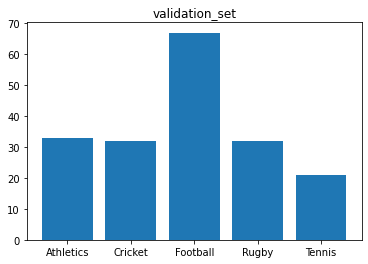

[33, 32, 67, 32, 21]

In [5]:
# Question 2.1
import matplotlib.pyplot as plt
import seaborn as sns
class_name_list = ["Athletics", "Cricket", "Football", "Rugby", "Tennis"]

def get_bar_plt(data,class_names:class_name_list,name):
  plt.clf()
  class_dist_list = []
  for i in range(0,5):
    df = (data.loc[train_data['class_label'] == i])
    class_dist_list.append(df.shape[0])
  plt.bar(class_name_list,class_dist_list)
  plt.title("{}".format(name))
  return plt.show(),class_dist_list

#get_bar_plt(train_data,class_name_list,"training_set")[1]
get_bar_plt(val_data,class_name_list,"validation_set")[1]

In [58]:
# Calculating priors P(Y = y_k)
def get_prob_priors(data):
  prob_prior_list = []
  # since we have 5 classes we will find the values in the class label column that equals to these class numbers
  for i in range(0,5): 
    prob_prior_list.append(data.loc[data['class_label'] == i].shape[0]/data.shape[0])
  return prob_prior_list
get_prob_priors(train_data)

[0.13949275362318841,
 0.15579710144927536,
 0.358695652173913,
 0.20652173913043478,
 0.13949275362318841]

In [40]:
def get_sum_row_col(data):
  data['sum_of_rows'] = data.iloc[:,0:data.shape[1] -2].sum(axis=1)
  return data

In [336]:
# Getting MLE estimate without smoothing
def get_mle_prob_list(data):
  get_sum_row_col(data)
  #print(data.loc[1,'sum_of_rows'])
  class_label_grouped_dataset = data.groupby('class_label').sum()
  clgd = class_label_grouped_dataset
  clgd.loc[0,"sum_of_rows"]
  clgd.iloc[0,0]/clgd.loc[0,"sum_of_rows"] # prob of the first one we need for all
  mle_prob_list = np.ones((5,train_total_cols-2)) #5,4613 for 5 classes and 4613 number of words
  for i in range(0,clgd.shape[0]): #rows
    for j in range(0,clgd.shape[1]-2): #cols
      mle_prob_list[i][j] = np.log2(clgd.iloc[i,j] / clgd.loc[i,"sum_of_rows"])
  mle_prob_list = np.nan_to_num(mle_prob_list)
  return mle_prob_list
get_mle_prob_list(train_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log2
  if sys.path[0] == '':


array([[-1.01764225e+001, -1.34983506e+001, -8.28889724e+000, ...,
        -1.79769313e+308, -1.79769313e+308, -1.79769313e+308],
       [-1.79769313e+308, -1.20683584e+001, -6.92880709e+000, ...,
        -1.79769313e+308, -1.79769313e+308, -1.79769313e+308],
       [-1.79769313e+308, -1.39445748e+001, -8.01383747e+000, ...,
        -1.79769313e+308, -1.79769313e+308, -1.79769313e+308],
       [-1.79769313e+308, -1.79769313e+308, -7.38697500e+000, ...,
        -1.79769313e+308, -1.79769313e+308, -1.79769313e+308],
       [-1.79769313e+308, -1.79769313e+308, -6.72885419e+000, ...,
        -1.79769313e+308, -1.18163170e+001, -1.18163170e+001]])

In [303]:
#getting MLE estimate with smoothing
def get_mle_prob_with_smoothing(data,alpha = 1):
  V_size = 4612 # 4612
  #get_sum_row_col(data)
  class_label_grouped_dataset = data.groupby('class_label').sum()
  clgd = class_label_grouped_dataset
  clgd.loc[0,"sum_of_rows"]
  clgd.iloc[0,0]/clgd.loc[0,"sum_of_rows"] # prob of the first one
  mle_prob_list = np.ones((5,train_total_cols-2)) #5,4613 for 5 classes and 4613 number of words
  for i in range(0,clgd.shape[0]): #rows
    for j in range(0,clgd.shape[1]-2): #cols
      mle_prob_list[i][j] = np.log2((clgd.iloc[i,j]+ alpha) / ((clgd.loc[i,"sum_of_rows"]) + alpha*V_size))
  mle_prob_list = np.nan_to_num(mle_prob_list)
  return mle_prob_list
get_mle_prob_with_smoothing(train_data)

array([[-10.52284899, -12.9822806 ,  -8.73435309, ..., -13.9822806 ,
        -13.9822806 , -13.9822806 ],
       [-14.41144478, -12.08951669,  -7.26169766, ..., -14.41144478,
        -14.41144478, -14.41144478],
       [-15.14150847, -13.55654597,  -8.19899396, ..., -15.14150847,
        -15.14150847, -15.14150847],
       [-14.63066529, -14.63066529,  -7.66488101, ..., -14.63066529,
        -14.63066529, -14.63066529],
       [-13.91354394, -13.91354394,  -7.22704341, ..., -13.91354394,
        -11.91354394, -11.91354394]])

### YOU CAN UNCOMMENT MLE_PROB_LIST command to change the results whether have smoothing or not

In [340]:
def get_prediction():
  class_0_prediction = np.ones((185,4612))
  class_1_prediction = np.ones((185,4612))
  class_2_prediction = np.ones((185,4612))
  class_3_prediction = np.ones((185,4612))
  class_4_prediction = np.ones((185,4612))

  mle_prob_list = get_mle_prob_list(train_data)
  #mle_prob_list = get_mle_prob_with_smoothing(train_data)
  
  prob_prior_list = get_prob_priors(train_data)

  prediction_array_0 = np.ones((1,185))
  prediction_array_1 = np.ones((1,185))
  prediction_array_2 = np.ones((1,185))
  prediction_array_3 = np.ones((1,185))
  prediction_array_4 = np.ones((1,185))

  count0 = 0
  count1 = 0
  count2 = 0
  count3 = 0
  count4 = 0

  for i in range(0,class_0_prediction.shape[0]):
    for j in range(0,class_0_prediction.shape[1]):
      class_0_prediction[i][j] = val_data.iloc[i,j] * mle_prob_list[0][j]
      count0 += class_0_prediction[i][j]
    count0 = count0 + prob_prior_list[0]
    prediction_array_0[0][i] = count0
    count0 = 0
  for i in range(0,class_0_prediction.shape[0]):
    for j in range(0,class_0_prediction.shape[1]):
      class_1_prediction[i][j] = val_data.iloc[i,j] * mle_prob_list[1][j]
      count1 += class_1_prediction[i][j]
    count1 = count1 + prob_prior_list[1]
    prediction_array_1[0][i] = count1
    count1 = 0
  for i in range(0,class_0_prediction.shape[0]):
    for j in range(0,class_0_prediction.shape[1]):
      class_2_prediction[i][j] = val_data.iloc[i,j] * mle_prob_list[2][j]
      count2 += class_2_prediction[i][j]
    count2 = count2 + prob_prior_list[2]
    prediction_array_2[0][i] = count2
    count2 = 0
  for i in range(0,class_0_prediction.shape[0]):
    for j in range(0,class_0_prediction.shape[1]):
      class_3_prediction[i][j] = val_data.iloc[i,j] * mle_prob_list[3][j]
      count3 += class_3_prediction[i][j]
    count3 = count3 + prob_prior_list[3]
    prediction_array_3[0][i] = count3
    count3 = 0
  for i in range(0,class_0_prediction.shape[0]):
    for j in range(0,class_0_prediction.shape[1]):
      class_4_prediction[i][j] = val_data.iloc[i,j] * mle_prob_list[4][j]
      count4 += class_4_prediction[i][j]
    count4 = count4 + prob_prior_list[4]
    prediction_array_4[0][i] = count4
    count4 = 0
  prediction = np.ones((1,185))
  comparison_array = np.ones((1,5))
  index = 0
  for i in range(0,prediction_array_0.shape[1]):
    comparison_array[0][0] = prediction_array_0[0][i]
    comparison_array[0][1] = prediction_array_1[0][i]
    comparison_array[0][2] = prediction_array_2[0][i]
    comparison_array[0][3] = prediction_array_3[0][i]
    comparison_array[0][4] = prediction_array_4[0][i]
    max = np.max(comparison_array)
    #print(max)
    index = np.where(comparison_array == max)
    #print(index)
    prediction[0][i] = index[1][0]
    max = 0
  #df0 = pd.DataFrame(class_0_prediction)
  #df0 = get_sum_row_col(df0)
  return prediction
x = get_prediction()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log2
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipyke

In [341]:
x,x.shape

(array([[0., 0., 0., 0., 4., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.,
         0., 0., 3., 0., 0., 0., 2., 1., 2., 0., 0., 4., 0., 0., 0., 0.,
         0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 2., 0.,
         0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0.,
         0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 2.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 2., 0.,
         0., 0., 0., 0., 0., 0., 2., 0., 0., 3., 0., 0., 0., 0., 2., 0.,
         0., 0., 0., 2., 0., 3., 0., 0., 1., 0., 0., 0., 0., 0., 0., 2.,
         0., 0., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0., 0., 2., 2., 0.,
         0., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]]), (1, 185))

In [342]:
#Scores without smoothing
score = 0
s0 = 0
s1 = 0
s2 = 0
s3 = 0
s4 = 0
for i in range(0,185):
  if x[0][i] == val_data.loc[i,"class_label"]:
    score += 1
for i in range(0,185):
  if x[0][i] == 0:
    s0 += 1
  if x[0][i] == 1:
    s1 += 1
  if x[0][i] == 2:
    s2 += 1
  if x[0][i] == 3:
    s3 += 1
  if x[0][i] == 4:
    s4 += 1
accuracy =score/185
print("%"+str(accuracy))
s0,s1,s2,s3,s4,accuracy
#as classes for validation data distribution is 24,38,67,33,23
#There are 8 differences out of 185

%0.31351351351351353


(151, 5, 22, 3, 4, 0.31351351351351353)

In [328]:
x,x.shape

(array([[4., 2., 1., 2., 4., 0., 0., 1., 2., 2., 1., 3., 3., 1., 0., 3.,
         1., 2., 3., 3., 3., 1., 2., 1., 3., 2., 3., 4., 3., 2., 3., 2.,
         1., 1., 3., 2., 2., 1., 2., 1., 2., 0., 1., 4., 3., 4., 4., 4.,
         2., 2., 2., 4., 2., 4., 0., 1., 0., 1., 2., 4., 0., 0., 2., 0.,
         3., 2., 1., 0., 2., 3., 0., 4., 0., 0., 3., 1., 2., 2., 4., 2.,
         2., 2., 2., 2., 3., 4., 2., 2., 4., 0., 2., 0., 2., 4., 3., 2.,
         1., 1., 0., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 3., 2., 1.,
         4., 0., 3., 2., 2., 3., 2., 2., 1., 3., 0., 1., 2., 3., 2., 3.,
         1., 1., 4., 2., 1., 3., 4., 3., 1., 2., 2., 3., 2., 3., 2., 2.,
         4., 3., 0., 2., 3., 4., 3., 3., 3., 2., 1., 2., 0., 2., 2., 2.,
         0., 3., 2., 2., 3., 2., 2., 1., 2., 0., 3., 1., 1., 2., 0., 0.,
         4., 2., 2., 3., 2., 0., 4., 2., 2.]]), (1, 185))

In [339]:
#Scores with smoothing
score = 0
s0 = 0
s1 = 0
s2 = 0
s3 = 0
s4 = 0
for i in range(0,185):
  if x[0][i] == val_data.loc[i,"class_label"]:
    score += 1
for i in range(0,185):
  if x[0][i] == 0:
    s0 += 1
  if x[0][i] == 1:
    s1 += 1
  if x[0][i] == 2:
    s2 += 1
  if x[0][i] == 3:
    s3 += 1
  if x[0][i] == 4:
    s4 += 1
accuracy =score/185
print("%"+str(accuracy))
s0,s1,s2,s3,s4,accuracy
#as classes for validation data distribution is 24,38,67,33,23
#There are 8 differences out of 185

%0.972972972972973


(25, 35, 67, 36, 22, 0.972972972972973)

In [ ]:
#24,38,67,33,23

In [175]:
# True values(for val_data) / getting priors with different method
val_data["class_label"]
class_count_0 = 0
class_count_1 = 0
class_count_2 = 0
class_count_3 = 0
class_count_4 = 0
max_row = val_data.shape[0]
for i in range(0,max_row):
  if val_data.loc[i,"class_label"] == 0:
    class_count_0 += 1
  elif val_data.loc[i,"class_label"] == 1:
    class_count_1 += 1
  elif val_data.loc[i,"class_label"] == 2:
    class_count_2 += 1
  elif val_data.loc[i,"class_label"] == 3:
    class_count_3 += 1
  elif val_data.loc[i,"class_label"] == 4:
    class_count_4 += 1
print(class_count_0)
print(class_count_1)
print(class_count_2)
print(class_count_3)
print(class_count_4)
max_row
prob_of_class_0 = class_count_0/max_row
prob_of_class_1 = class_count_1/max_row
prob_of_class_2 = class_count_2/max_row
prob_of_class_3 = class_count_3/max_row
prob_of_class_4 = class_count_4/max_row
print(prob_of_class_0)
print(prob_of_class_1)
print(prob_of_class_2)
print(prob_of_class_3)
print(prob_of_class_4)
get_prob_priors(val_data) #easy way

24
38
67
33
23
0.12972972972972974
0.20540540540540542
0.3621621621621622
0.1783783783783784
0.12432432432432433


[0.12972972972972974,
 0.20540540540540542,
 0.3621621621621622,
 0.1783783783783784,
 0.12432432432432433]